<a href="https://colab.research.google.com/github/FrancescoTorella/progettoLabAI/blob/main/images_analyze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install rasterio
import rasterio
import matplotlib.pyplot as plt
import numpy as np
from skimage import exposure

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 42.1 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Ho deciso di dare un'occhiata alle immagini prima di lavorarci, aprendole con un tool suggerito da drive mi sono sembrate molto scure

In [10]:
# Funzione per caricare e normalizzare un'immagine
def load_and_normalize_NIR_image(img_path):
    with rasterio.open(img_path) as src:
        img = src.read()
    R = img[0]
    G = img[1]
    B = img[2]
    NIR = img[3]
    return normalize(R), normalize(G), normalize(B), normalize(NIR)

# Funzione per caricare e normalizzare un'immagine
def load_and_normalize_RGB_image(img_path):
    with rasterio.open(img_path) as src:
        img = src.read()
    R = img[0]
    G = img[1]
    B = img[2]
    return normalize(R), normalize(G), normalize(B)


# Funzione per normalizzare i valori dei pixel
def normalize(channel):
    channel_min, channel_max = channel.min(), channel.max()
    return (channel - channel_min) / (channel_max - channel_min)


# Funzione per applicare lo stiramento del contrasto
def contrast_stretching(channel, lower_percentile=2, upper_percentile=98):
    lower = np.percentile(channel, lower_percentile)
    upper = np.percentile(channel, upper_percentile)
    stretched_channel = (channel - lower) / (upper - lower)
    stretched_channel = np.clip(stretched_channel, 0, 1)
    return stretched_channel

# Funzione per applicare CLAHE
def apply_clahe(channel, clip_limit=0.03):
    return exposure.equalize_adapthist(channel, clip_limit=clip_limit)


# Funzione per visualizzare l'istogramma
def plot_histogram(channel, channel_name):
    plt.figure(figsize=(10, 5))
    plt.hist(channel.flatten(), bins=256, color='gray', alpha=0.7)
    plt.title(f'Histogram of {channel_name} channel')
    plt.xlabel('Pixel value')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


# Visualizza le immagini
def show_image(rgb, title):
    plt.figure(figsize=(10, 5))
    plt.imshow(rgb)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Calcola le statistiche per ciascun canale
def calculate_statistics(channel):
    mean_val = np.mean(channel)
    std_val = np.std(channel)
    var_val = np.var(channel)
    return mean_val, std_val, var_val

In [8]:
# Percorsi alle immagini
equalized_img_path = '/content/drive/My Drive/progettoLabAi3/train/PS-RGBNIR/SN6_Train_AOI_11_Rotterdam_PS-RGBNIR_20190823162315_20190823162606_tile_7879.tif'
original_img_path = '/content/drive/My Drive/progettoLabAi3/train/PS-RGB/SN6_Train_AOI_11_Rotterdam_PS-RGB_20190823162315_20190823162606_tile_7879.tif'


In [14]:
# Carica e normalizza le immagini
R_equalized, G_equalized, B_equalized, NIR_equalized = load_and_normalize_NIR_image(equalized_img_path)
R_original, G_original, B_original = load_and_normalize_RGB_image(original_img_path)

# Applica lo stiramento del contrasto ai canali originali
R_stretched = contrast_stretching(R_equalized)
G_stretched = contrast_stretching(G_equalized)
B_stretched = contrast_stretching(B_equalized)
NIR_stretched = contrast_stretching(NIR_equalized)

# Applica CLAHE ai canali originali
R_clahe = apply_clahe(R_equalized)
G_clahe = apply_clahe(G_equalized)
B_clahe = apply_clahe(B_equalized)
NIR_clahe = apply_clahe(NIR_equalized)

Stampando i primi esempi mi sono reso conto che le immagini erano di fatti molto scure, qui sotto c'è l'istogramma ottenuto dalle immagini in versione non NIR (solo RGB), quello originale, e quello di due trasformazioni che ho trovato.

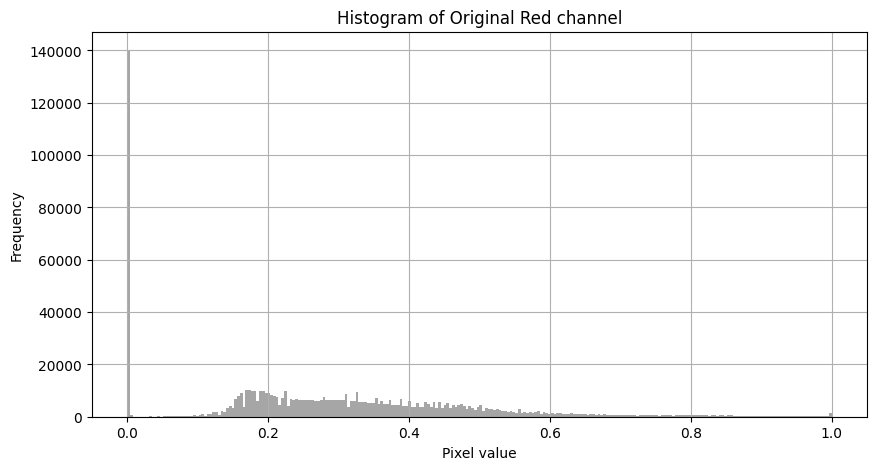

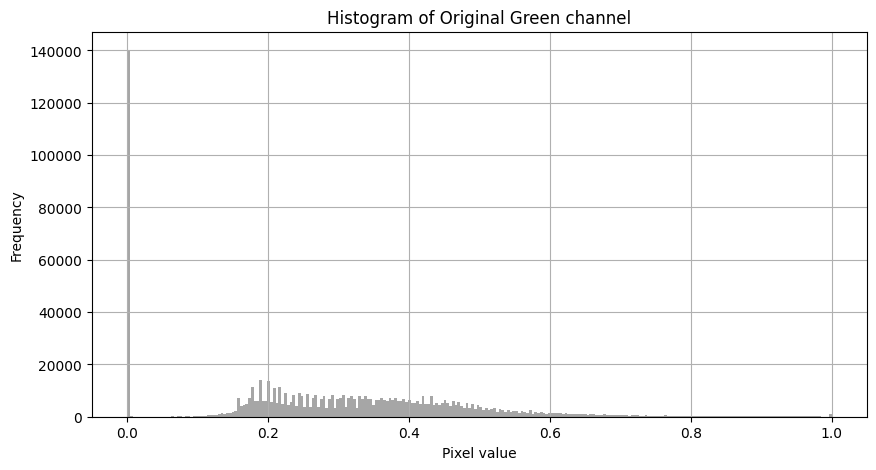

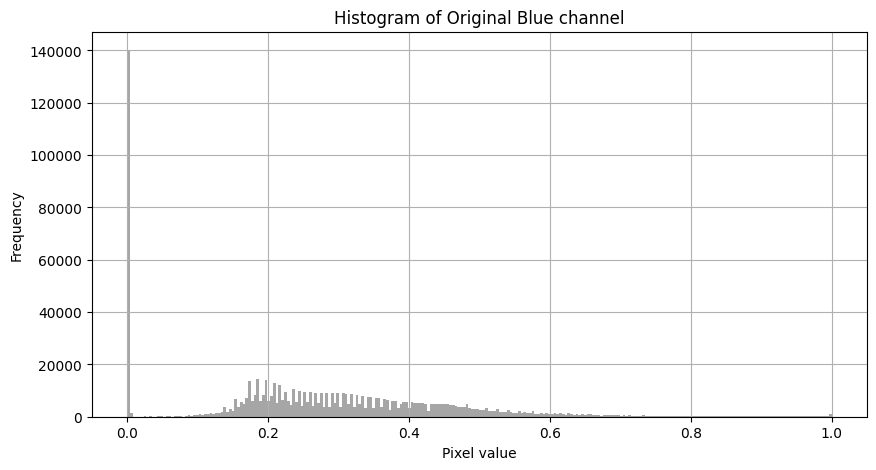

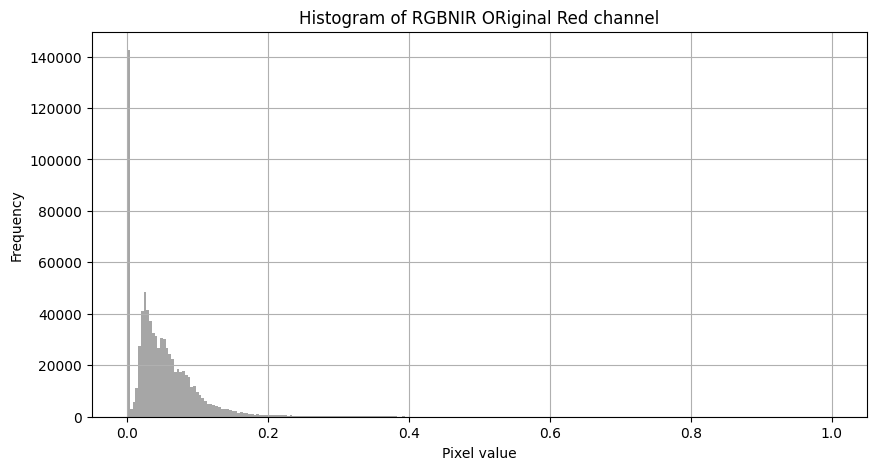

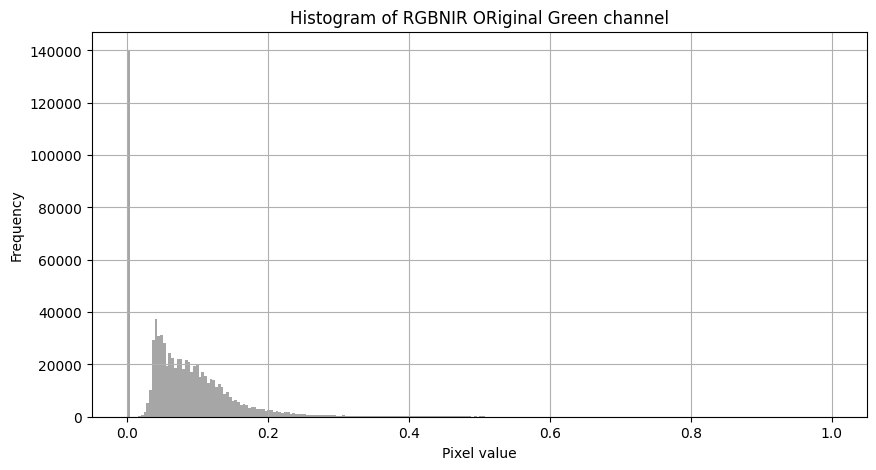

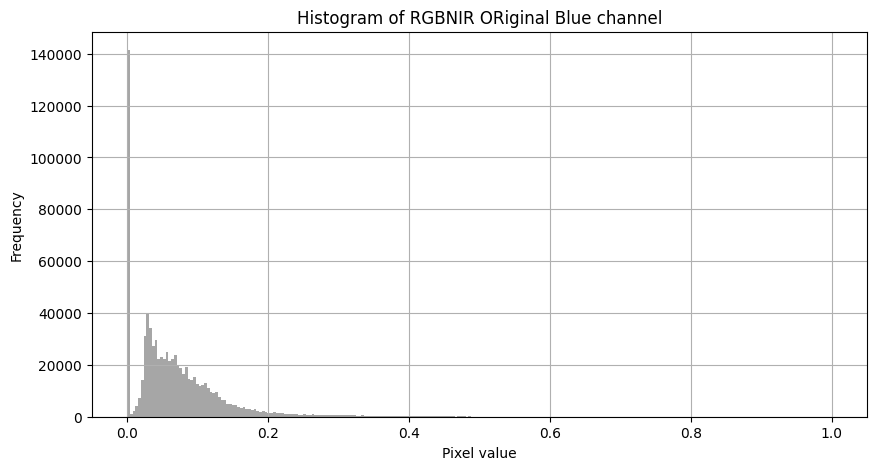

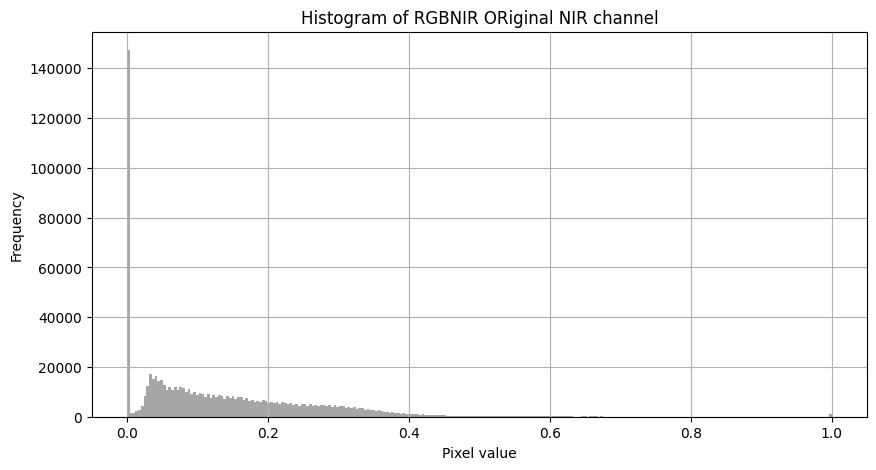

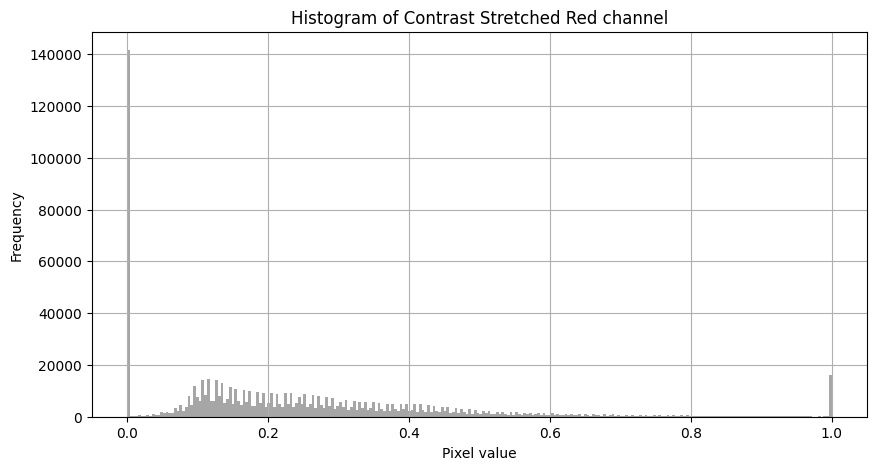

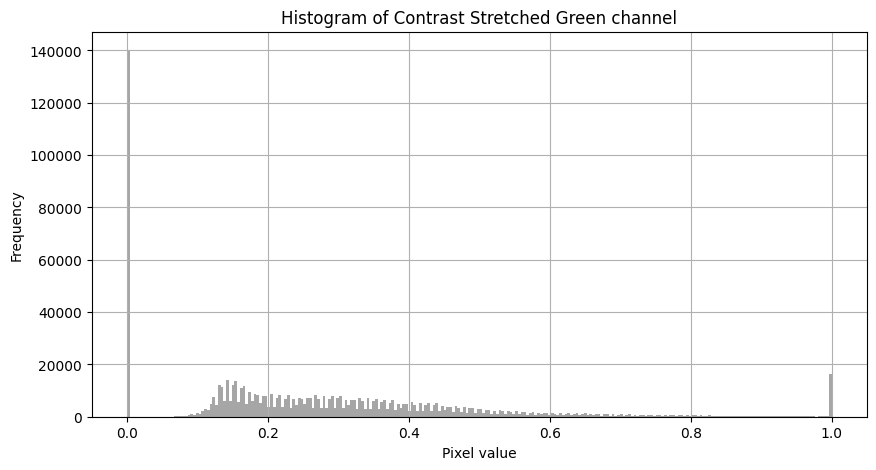

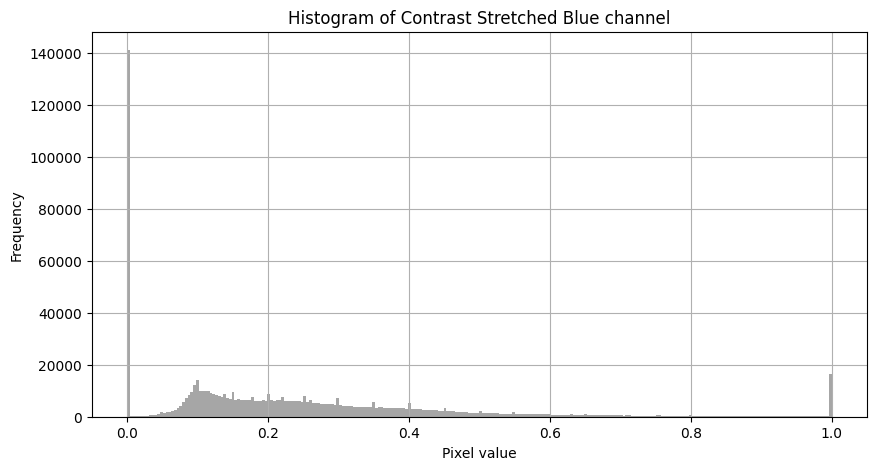

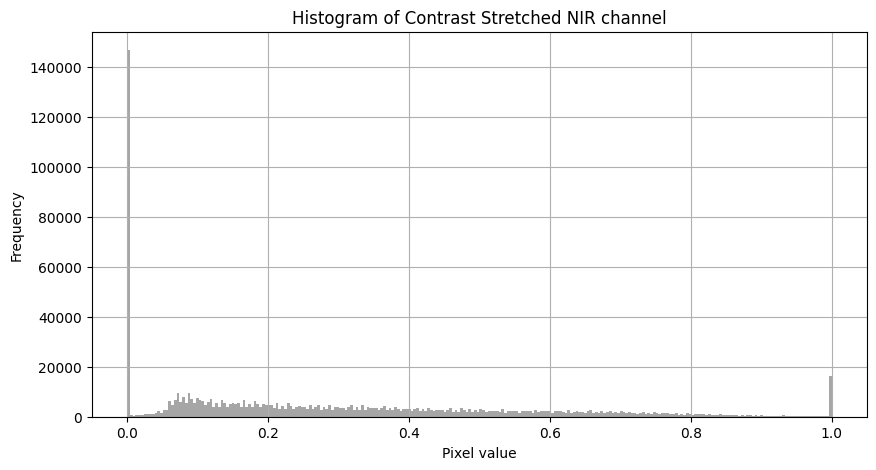

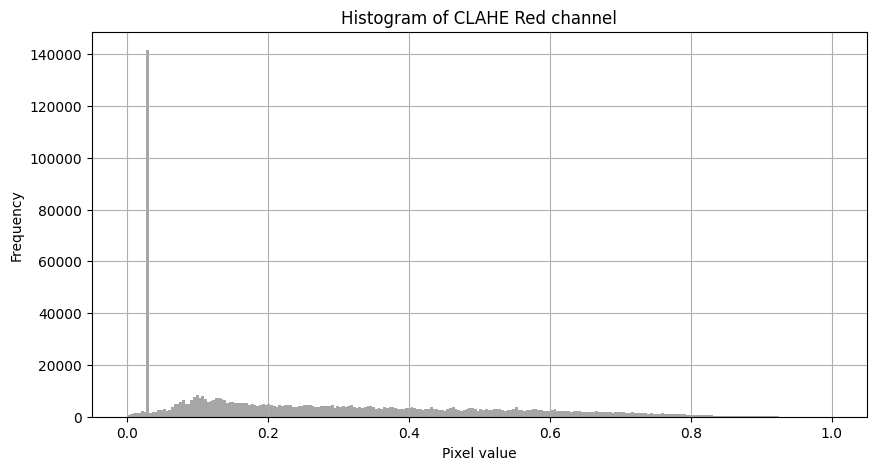

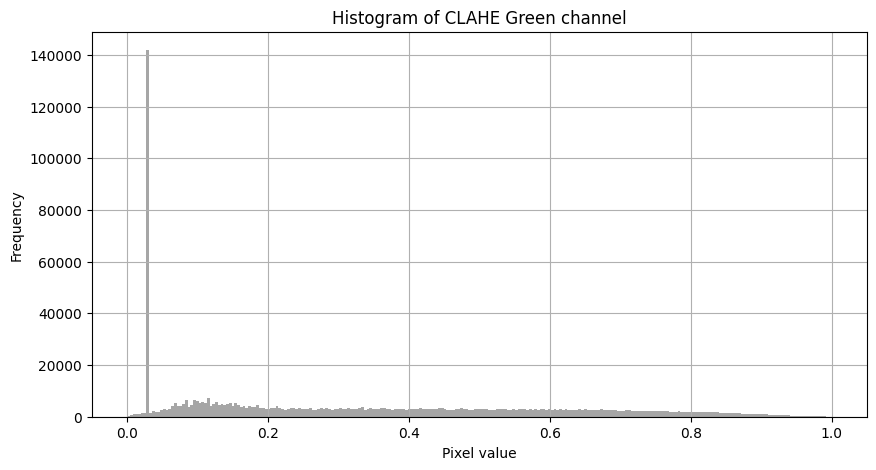

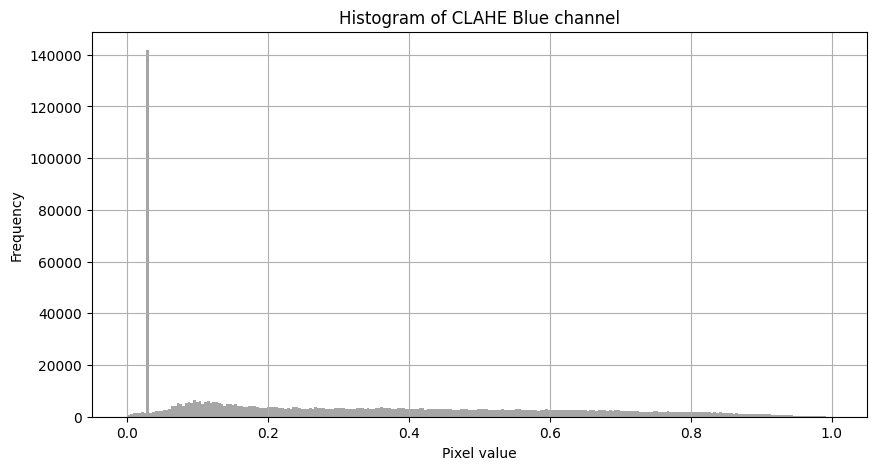

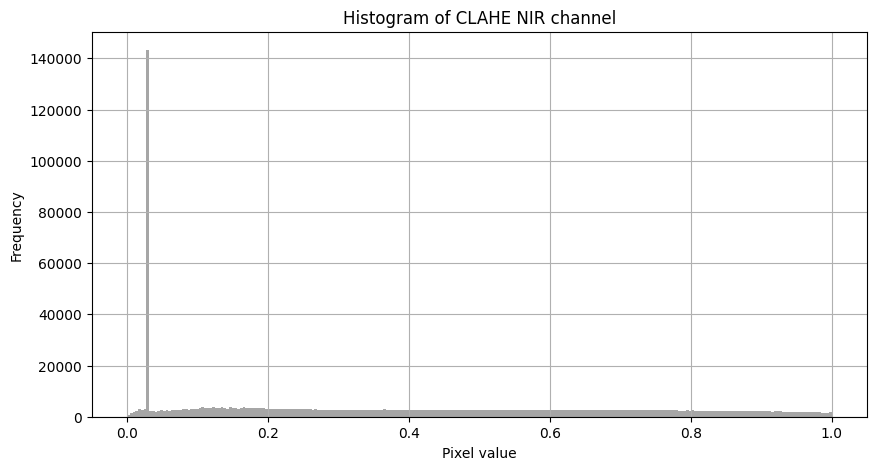

In [15]:
# Visualizza gli istogrammi per le immagini rgb originali
plot_histogram(R_original, 'Original Red')
plot_histogram(G_original, 'Original Green')
plot_histogram(B_original, 'Original Blue')

#Visualizza gli istogrammi per le immagini RGBNIR originali
plot_histogram(R_equalized, 'RGBNIR ORiginal Red')
plot_histogram(G_equalized, 'RGBNIR ORiginal Green')
plot_histogram(B_equalized, 'RGBNIR ORiginal Blue')
plot_histogram(NIR_equalized, 'RGBNIR ORiginal NIR')

#Visualizza gli istogrammi per le immagini trasformate con streched
plot_histogram(R_stretched, 'Contrast Stretched Red')
plot_histogram(G_stretched, 'Contrast Stretched Green')
plot_histogram(B_stretched, 'Contrast Stretched Blue')
plot_histogram(NIR_stretched, 'Contrast Stretched NIR')

#visualizza le immagini trasformate con clahe
plot_histogram(R_clahe, 'CLAHE Red')
plot_histogram(G_clahe, 'CLAHE Green')
plot_histogram(B_clahe, 'CLAHE Blue')
plot_histogram(NIR_clahe, 'CLAHE NIR')

Come possiamo notare le immagini origninali sono molto scure, dovrò chiedere informazioni a riguardo

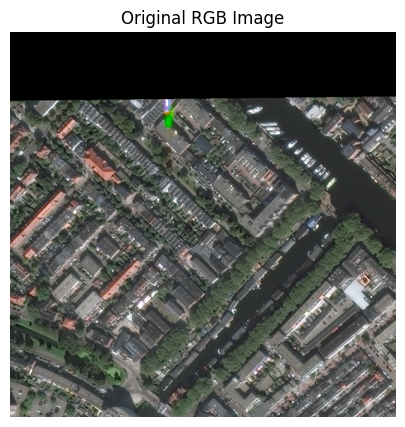

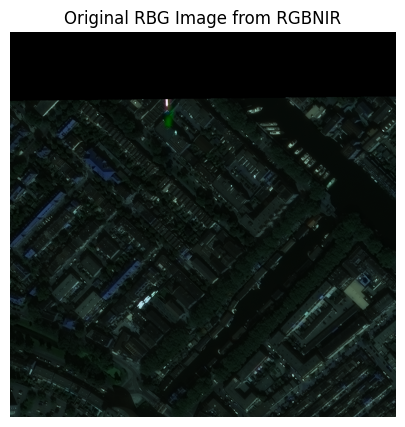

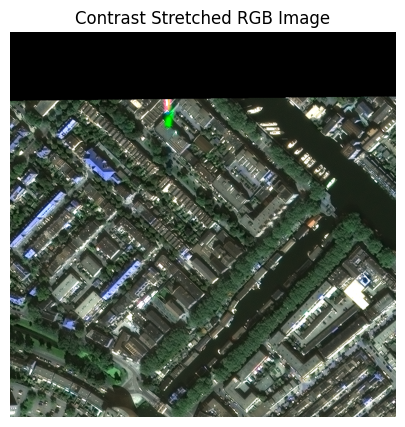

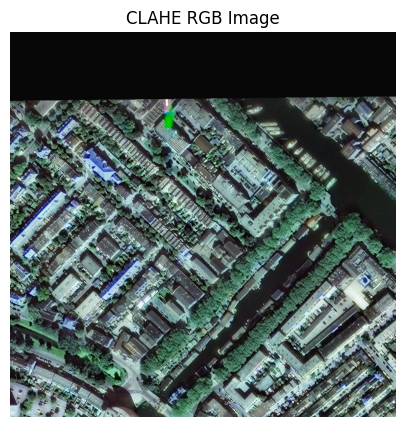

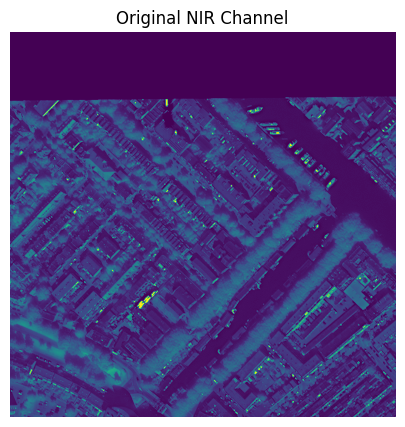

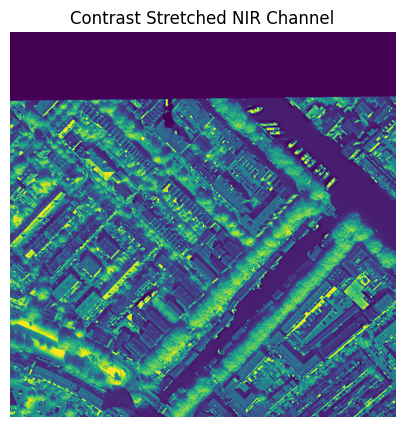

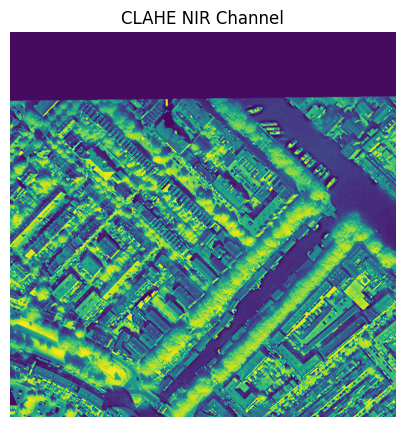

In [18]:
# Combina i canali R, G e B per creare un'immagine a colori
rgb_original = np.dstack((R_original, G_original, B_original))
rgbnir_original = np.dstack((R_equalized,G_equalized,B_equalized))
rgb_stretched = np.dstack((R_stretched, G_stretched, B_stretched))
rgb_clahe = np.dstack((R_clahe, G_clahe, B_clahe))

show_image(rgb_original, 'Original RGB Image')
show_image(rgbnir_original, 'Original RBG Image from RGBNIR')
show_image(rgb_stretched, 'Contrast Stretched RGB Image')
show_image(rgb_clahe, 'CLAHE RGB Image')

# Visualizza il canale NIR
show_image(NIR_equalized, 'Original NIR Channel')
show_image(NIR_stretched, 'Contrast Stretched NIR Channel')
show_image(NIR_clahe, 'CLAHE NIR Channel')

In [19]:

channels = {
    'Original Red': R_original,
    'Original Green': G_original,
    'Original Blue': B_original,
    'Original RGBNIR Red': R_equalized,
    'Original RGBNIR Green': G_equalized,
    'Original RGBNIR Blue': B_equalized,
    'Original RGBNIR NIR': NIR_equalized,
    'Contrast Stretched Red': R_stretched,
    'Contrast Stretched Green': G_stretched,
    'Contrast Stretched Blue': B_stretched,
    'Contrast Stretched NIR': NIR_stretched,
    'CLAHE Red': R_clahe,
    'CLAHE Green': G_clahe,
    'CLAHE Blue': B_clahe,
    'CLAHE NIR': NIR_clahe
}

statistics = {}
for name, channel in channels.items():
    statistics[name] = calculate_statistics(channel)

# Stampa le statistiche
for channel, stats in statistics.items():
    print(f"Statistics for {channel} channel:")
    print(f"  Mean: {stats[0]}")
    print(f"  Standard Deviation: {stats[1]}")
    print(f"  Variance: {stats[2]}")
    print()

Statistics for Original Red channel:
  Mean: 0.2912407455821835
  Standard Deviation: 0.2049420734883179
  Variance: 0.04200125348569109

Statistics for Original Green channel:
  Mean: 0.2969848220769789
  Standard Deviation: 0.1956131820977002
  Variance: 0.03826451701038802

Statistics for Original Blue channel:
  Mean: 0.2818408424110385
  Standard Deviation: 0.19440716038474332
  Variance: 0.03779414400885931

Statistics for Original RGBNIR Red channel:
  Mean: 0.05238041430064695
  Standard Deviation: 0.055094081788422365
  Variance: 0.003035357848109373

Statistics for Original RGBNIR Green channel:
  Mean: 0.08304775223499361
  Standard Deviation: 0.07559606727957223
  Variance: 0.005714765388137611

Statistics for Original RGBNIR Blue channel:
  Mean: 0.07090505020399514
  Standard Deviation: 0.07327372843481585
  Variance: 0.005369039278739141

Statistics for Original RGBNIR NIR channel:
  Mean: 0.13678165397118336
  Standard Deviation: 0.13203264575454293
  Variance: 0.017432

Anche le statistiche suggeriscono valori molto bassi a livello di pixel